In [1]:
from keras.models import load_model
import os
from IJCAI19.module.utils import * 
from IJCAI19.model.xception_keras import XceptionFineTune19, preprocess_input


Using TensorFlow backend.


In [3]:
saved_model = 'jobs/model/keras_xception_19.h5'
if os.path.exists(saved_model):
    model = load_model(saved_model)
    print("loaded pretrained model from ", saved_model)
model.summary()

loaded pretrained model from  jobs/model/keras_xception_19.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
final_gap (GlobalAveragePool (None, 2048)              0         
_________________________________________________________________
final_dense_mapping (Dense)  (None, 110)               225390    
Total params: 21,086,870
Trainable params: 7,013,774
Non-trainable params: 14,073,096
_________________________________________________________________


In [ ]:
saved_model = 'jobs/logs/xception19.h5'
if os.path.exists(saved_model):
    model2 = load_model(saved_model)
    print("loaded pretrained model from ", saved_model)
model2.summary()

In [3]:
batch_shape = (110, 299, 299, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)
X = preprocess_input(X)
loss,accuracy = model.evaluate(X,Y)
print('\ntest loss',loss)
print('accuracy',accuracy)

110/110 [==============================] - 14s 128ms/step

test loss 1.9797267805446277
accuracy 0.49090909416025336


In [11]:
from IJCAI19.module.EnhancedDataGenerator import MultiDataGenerator
IMAGE_SIZE = 299
CLASS_SIZE = 110
BATCH_SIZE = 26
VALIDATION_SPLIT = 0.05
sources = {
    'good':{
        'directory': '../official_data/prepared_train_data/good/',
        'shuffle_num': 100,
    },
    'bad':{
        'directory': '../official_data/prepared_train_data/bad/',
        'shuffle_num': 8,
    },
    'adv':{
        'directory': '../official_data/prepared_train_data/adv/',
        'shuffle_num': 12,
    },
}
MDG = MultiDataGenerator(sources, 
                    msb_max=24, msb_rate=0.1, 
                    rotation_range=20,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.05,
                    channel_shift_range=4,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    preprocessing_function = preprocess_input,
                    validation_split=VALIDATION_SPLIT)
train_generator = MDG.get_train_flow(target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)
validation_generator = MDG.get_valid_flow(target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

{'rotation_range': 20, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'shear_range': 0.1, 'zoom_range': 0.05, 'channel_shift_range': 4, 'horizontal_flip': True, 'fill_mode': 'nearest', 'preprocessing_function': <function keras_modules_injection.<locals>.wrapper at 0x000000000D730D08>, 'validation_split': 0.05}
{'rotation_range': 20, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'shear_range': 0.1, 'zoom_range': 0.05, 'channel_shift_range': 4, 'horizontal_flip': True, 'fill_mode': 'nearest', 'validation_split': 0.05}
{'rotation_range': 20, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'shear_range': 0.1, 'zoom_range': 0.05, 'channel_shift_range': 4, 'horizontal_flip': True, 'fill_mode': 'nearest', 'preprocessing_function': <function keras_modules_injection.<locals>.wrapper at 0x000000000D730D08>, 'validation_split': 0.05}
{'rotation_range': 20, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'shear_range': 0.1, 'zoom_range': 0.05, 'channel_shift_range': 4, 'hori

26/26 [==============================] - 2s 66ms/step

test loss 2.577268829712501
accuracy 0.38461538461538464


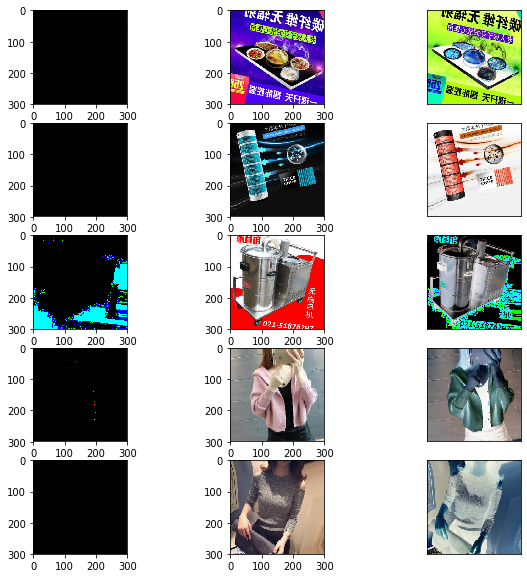

In [12]:
X,Y  = next(train_generator)
# X = preprocess_input(X)
loss,accuracy = model.evaluate(X,Y, batch_size=8)
print('\ntest loss',loss)
print('accuracy',accuracy)
plot_images(X,(X+1)*255/2, 10)

In [5]:
X.mean()

0.31348965

In [8]:
MDG.sources['adv']['generator']._preprocessing_function

<function keras.applications.keras_modules_injection.<locals>.wrapper(*args, **kwargs)>